<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE-258-assignment-3/blob/main/CMPE_258_assignment_3_Part_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

We are trying to learn y = 3x1^2+4x2^2+X3^2+3x1+4x2+x3

In [4]:
n=200
d = 3
x = np.random.uniform(-1,1,(n,d))

In [5]:
x

array([[-3.46225116e-01,  8.88680681e-01, -2.35475215e-01],
       [-8.77545651e-01,  4.44766621e-01,  4.77679063e-01],
       [-5.05607115e-01,  8.30295236e-01, -3.34144940e-01],
       [ 1.64748324e-01, -1.37769660e-01, -1.64219795e-01],
       [ 3.80722552e-01, -5.74693252e-01,  6.77177024e-01],
       [ 7.57376534e-01,  4.18424084e-01, -2.24737645e-01],
       [ 9.26115545e-01,  7.16563122e-01,  4.06603910e-01],
       [ 7.78017041e-02, -3.82521465e-01, -1.02701421e-01],
       [ 9.35703987e-01,  3.68166919e-01, -7.59353186e-01],
       [-5.72141048e-01, -9.51228364e-01, -3.59636601e-01],
       [ 7.41069660e-01,  6.18196124e-01,  7.58194405e-02],
       [-4.31414286e-01,  4.01423631e-01, -4.69117379e-01],
       [ 2.17121950e-01,  5.60829187e-01, -8.20163422e-01],
       [-1.49675359e-01,  1.02656764e-02,  7.23909681e-01],
       [ 6.92709649e-02,  2.57094126e-02,  6.64296873e-01],
       [-9.98958906e-03,  2.27761756e-01,  6.51505309e-01],
       [-3.96705983e-01,  2.72247333e-01

In [6]:
weights_true = np.array([[3,4,1],]).T

In [7]:
weights_true

array([[3],
       [4],
       [1]])

In [8]:
bias_true = np.array([10])

In [9]:
y_true = (x**2) @ weights_true + x @ weights_true

In [10]:
print(f'X : {x.shape}, weights : {weights_true.shape}, bias : {bias_true.shape}, y : {y_true.shape}')

X : (200, 3), weights : (3, 1), bias : (1,), y : (200, 1)


In [11]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

generated data

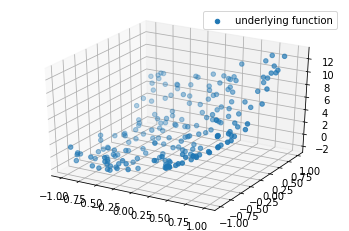

In [12]:
plot_3d(x,y_true)

Part A: 

Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withotu using pytorch builtin layer functionality

In [13]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

In [14]:
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(16.9527, grad_fn=<MseLossBackward0>)


Optimizing with SGD

In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(16.9527, grad_fn=<MseLossBackward0>)
tensor(13.5332, grad_fn=<MseLossBackward0>)


Implementing the Fit function

In [16]:
from typing import Callable

In [20]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

tensor(0.5455, grad_fn=<MseLossBackward0>)
tensor(0.6051, grad_fn=<MseLossBackward0>)
tensor(0.6897, grad_fn=<MseLossBackward0>)
tensor(0.8725, grad_fn=<MseLossBackward0>)
tensor(1.0688, grad_fn=<MseLossBackward0>)
tensor(1.5288, grad_fn=<MseLossBackward0>)
tensor(1.8583, grad_fn=<MseLossBackward0>)
tensor(2.7387, grad_fn=<MseLossBackward0>)
tensor(2.6293, grad_fn=<MseLossBackward0>)
tensor(3.3119, grad_fn=<MseLossBackward0>)
tensor(1.9938, grad_fn=<MseLossBackward0>)
tensor(1.9074, grad_fn=<MseLossBackward0>)
tensor(1.0986, grad_fn=<MseLossBackward0>)
tensor(0.9543, grad_fn=<MseLossBackward0>)
tensor(0.6991, grad_fn=<MseLossBackward0>)
tensor(0.6320, grad_fn=<MseLossBackward0>)
tensor(0.5417, grad_fn=<MseLossBackward0>)
tensor(0.5080, grad_fn=<MseLossBackward0>)
tensor(0.4651, grad_fn=<MseLossBackward0>)
tensor(0.4448, grad_fn=<MseLossBackward0>)
tensor(0.4211, grad_fn=<MseLossBackward0>)
tensor(0.4082, grad_fn=<MseLossBackward0>)
tensor(0.3934, grad_fn=<MseLossBackward0>)
tensor(0.38

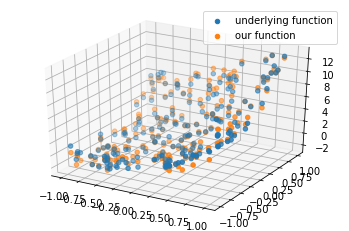

In [21]:
torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=60)
plot_3d(x, y_true, model(x_tensor).detach())

Repeated running of nearly 160 epochs reduced the value of loss to 0.3113